In [1]:
%%capture
%run cowling_approximation/fModes.py

import h5py
from tqdm.notebook import tqdm_notebook as tqdm
from os import listdir
import time

In [2]:
def listdir_nohidden(path):
    for f in listdir(path):
        if not f.startswith('.'):
            yield f

In [3]:
saved_path = "/Users/utkarsh/PycharmProjects/fmodes/posterior_fmodes/"
curr_list = list(listdir_nohidden(saved_path))

In [4]:
data = h5py.File('/Users/utkarsh/Downloads/LCEHL_EOS_posterior_samples_PSR+GW+NICER.h5', 'r') # EOS posterior conditioned on PSR observations
eos = data["eos"]
names = list(data["eos"].keys())

eos_0 already optimized... Skipping
eos_1 already optimized... Skipping
eos_10 already optimized... Skipping
eos_100
[ERROR] Integration Failure: eos_100... Skipping
eos_1000


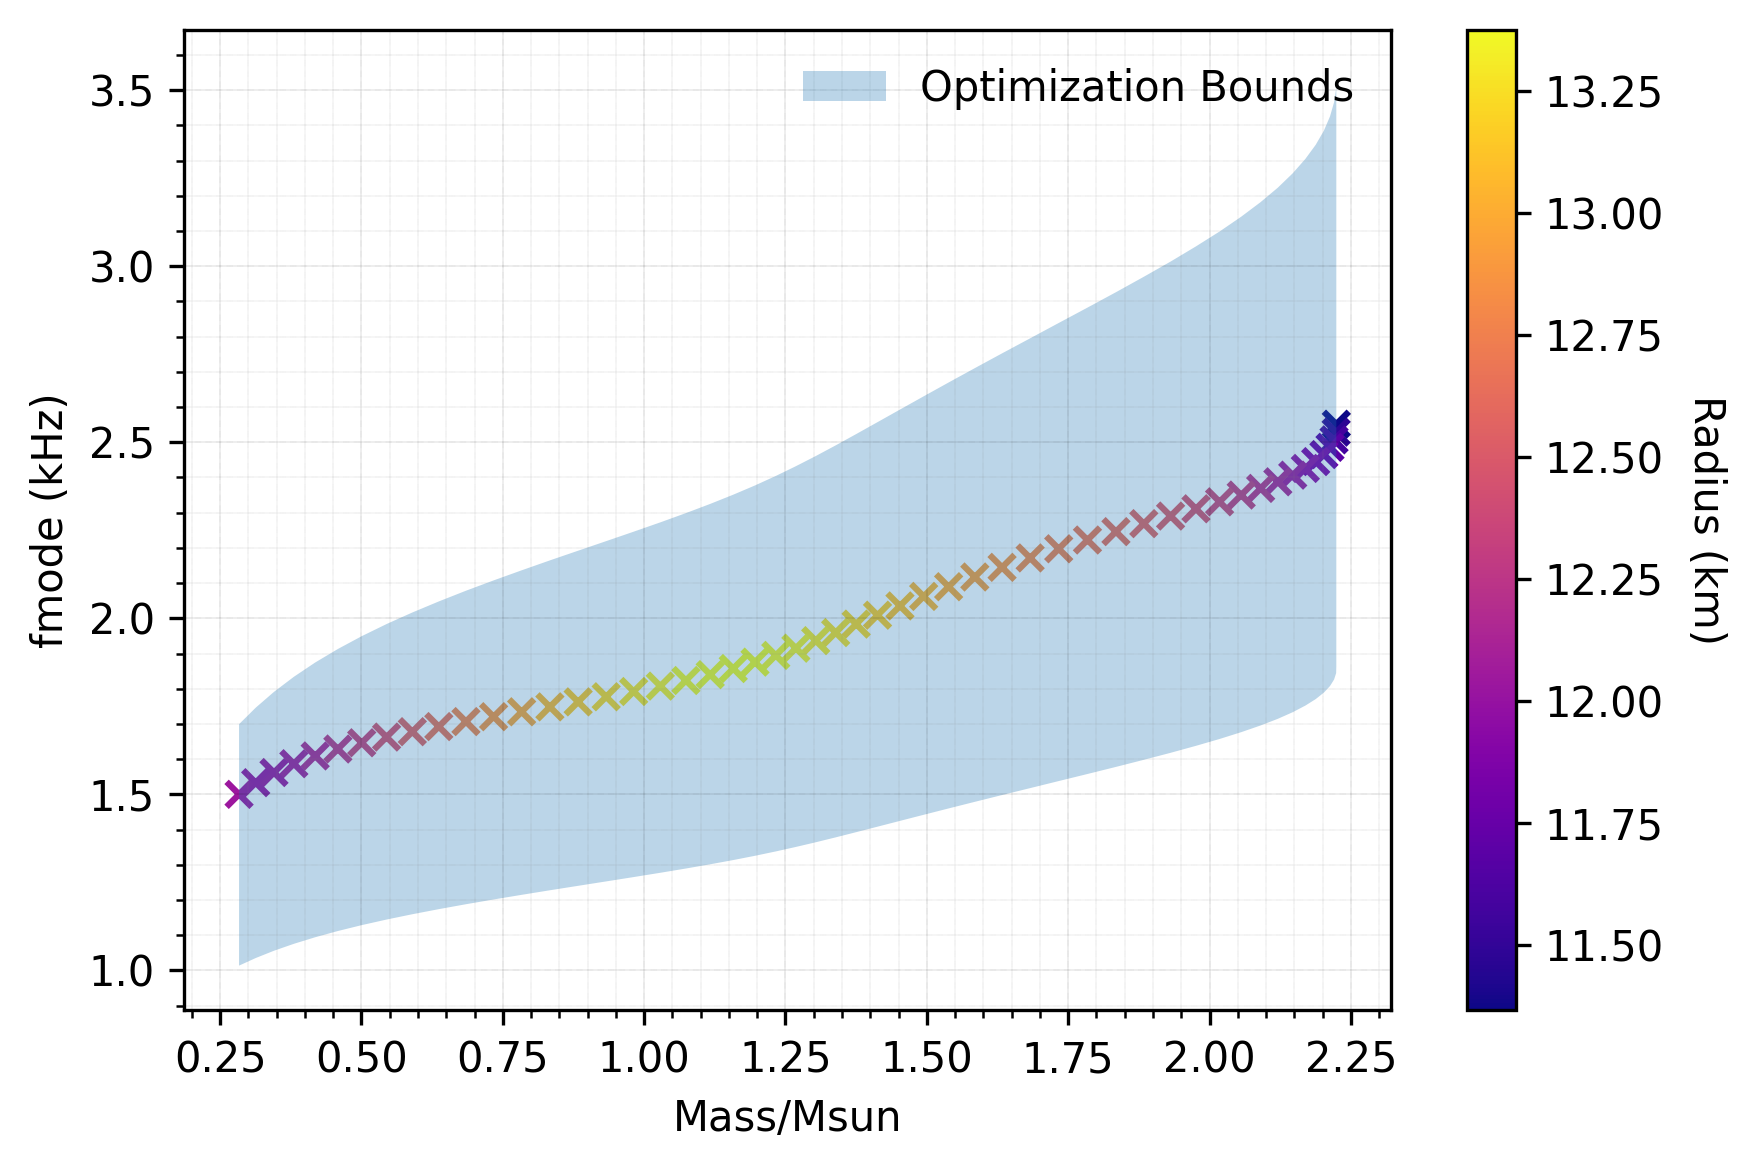

eos_1001


In [ ]:
%%time
vals = range(len(names))
pbar = tqdm(total=len(vals))
for i in vals:
    eos_name = names[i]
    if (eos_name + ".csv") in curr_list:
        print(f"{eos_name} already optimized... Skipping")
        pbar.update(1)
        time.sleep(0.01)
        continue
    fmodes1 = fmodes()
    fmodes1.set_EOS("/Users/utkarsh/PycharmProjects/fmodes/LCEHL_EOS_posterior_samples/" + eos_name + ".csv")
    try:
        fmodes1.parallel_simulation()
    except:
        print(f"[ERROR] Integration Failure: {eos_name}... Skipping")
        pbar.update(1)
        time.sleep(0.01)
        continue
#     fmodes1.print_results()
    fmodes1.plot_fmass()

    res = np.array([fmodes1.mass_arr, fmodes1.radius_arr, fmodes1.f_mode_arr])
    np.savetxt("posterior_fmodes/"+eos_name+".csv", res.T, 
                   header = "mass,radius,fmode", 
                   comments = "", 
                  delimiter = ",")
    pbar.update(1)
    time.sleep(0.01)
    print(f"[STATUS] Completed {eos_name}...")
pbar.close()